In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization

In [4]:
df = pd.read_csv('final_scaled_data.csv')
df.head()

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,labels,continues_target
0,0.268293,0,0.007726,1,0,1,0,0.276005,0,0,0,0,0,2,1442.0
1,0.548780,1,0.001840,1,0,1,1,0.300254,1,0,0,0,0,2,2965.0
2,0.841463,0,0.000292,1,0,1,0,0.276005,0,0,0,1,0,2,806.0
3,0.841463,0,0.001349,1,0,1,1,0.173028,1,0,0,0,0,2,2807.0
4,0.207317,0,0.000047,1,0,1,1,0.353690,1,0,0,1,0,2,3434.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3682 non-null   float64
 1   sex               3682 non-null   int64  
 2   TSH               3682 non-null   float64
 3   TSH measured      3682 non-null   int64  
 4   pregnant          3682 non-null   int64  
 5   TT4 measured      3682 non-null   int64  
 6   T4U measured      3682 non-null   int64  
 7   FTI               3682 non-null   float64
 8   FTI measured      3682 non-null   int64  
 9   I131 treatment    3682 non-null   int64  
 10  psych             3682 non-null   int64  
 11  on thyroxine      3682 non-null   int64  
 12  sick              3682 non-null   int64  
 13  labels            3682 non-null   int64  
 14  continues_target  3682 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 431.6 KB


In [4]:
df['labels'].value_counts()

2    3520
1     149
0      13
Name: labels, dtype: int64

In [5]:
x = df.drop('labels',axis=1)
y = df['labels']

In [12]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
scaler.fit(x_train)

StandardScaler()

In [11]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [9]:
x_train[:5]

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,continues_target
1001,0.231707,1,0.009590,0,0,1,0,0.276005,0,0,0,0,0,699.0
2493,0.841463,1,0.004330,1,0,1,1,0.262087,1,0,0,0,0,1544.0
1284,0.926829,0,0.000500,1,0,0,0,0.276005,0,0,0,0,0,906.0
1151,0.512195,0,0.000368,1,0,1,1,0.458015,1,0,0,1,0,124.0
3201,0.817073,0,0.009047,1,0,1,1,0.226463,1,0,0,0,0,3300.0


In [12]:
x_train_scaler

array([[-1.66444855,  1.52444343,  0.01023166, ..., -0.38722271,
        -0.19604697, -1.09779386],
       [ 1.03603018,  1.52444343, -0.11788753, ..., -0.38722271,
        -0.19604697, -0.32103275],
       [ 1.41409721, -0.65597711, -0.21117778, ..., -0.38722271,
        -0.19604697, -0.90751037],
       ...,
       [ 0.76598231, -0.65597711, -0.15465216, ..., -0.38722271,
        -0.19604697,  1.07254103],
       [-0.15218046,  1.52444343, -0.18682121, ..., -0.38722271,
        -0.19604697, -1.15202925],
       [-0.15218046, -0.65597711, -0.20060794, ..., -0.38722271,
        -0.19604697, -1.15111001]])

In [25]:
x_train_df = pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_df = pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [26]:
x_train_df

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,continues_target
0,-1.664449,1.524443,0.010232,-3.055050,-0.12872,0.249052,-3.043242,-0.002540,-3.055050,-0.130076,-0.223407,-0.387223,-0.196047,-1.097794
1,1.036030,1.524443,-0.117888,0.327327,-0.12872,0.249052,0.328597,-0.174567,0.327327,-0.130076,-0.223407,-0.387223,-0.196047,-0.321033
2,1.414097,-0.655977,-0.211178,0.327327,-0.12872,-4.015233,-3.043242,-0.002540,-3.055050,-0.130076,-0.223407,-0.387223,-0.196047,-0.907510
3,-0.422228,-0.655977,-0.214395,0.327327,-0.12872,0.249052,0.328597,2.246976,0.327327,-0.130076,-0.223407,2.582493,-0.196047,-1.626359
4,0.928011,-0.655977,-0.002998,0.327327,-0.12872,0.249052,0.328597,-0.614847,0.327327,-0.130076,-0.223407,-0.387223,-0.196047,1.293160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,-0.908315,-0.655977,0.010232,-3.055050,-0.12872,-4.015233,-3.043242,-0.002540,-3.055050,-0.130076,-0.223407,-0.387223,-0.196047,-1.379083
2941,-0.044161,1.524443,-0.085718,0.327327,-0.12872,0.249052,0.328597,-0.897885,0.327327,-0.130076,-0.223407,-0.387223,-0.196047,-0.627141
2942,0.765982,-0.655977,-0.154652,0.327327,-0.12872,0.249052,0.328597,0.014125,0.327327,-0.130076,-0.223407,-0.387223,-0.196047,1.072541
2943,-0.152180,1.524443,-0.186821,0.327327,-0.12872,0.249052,0.328597,-0.111669,0.327327,-0.130076,-0.223407,-0.387223,-0.196047,-1.152029


In [22]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()
clf_scaler = LogisticRegression()

In [28]:
clf.fit(x_train,y_train)
clf_scaler.fit(x_train_df,y_train)

LogisticRegression()

In [31]:
y_pred = clf.predict(x_test)
y_pred_scaler = clf_scaler.predict(x_test_df)

In [27]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred_scaler))

0.9769335142469471
0.9769335142469471


In [34]:
np.round(x_train.describe(),1)

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,continues_target
count,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0
mean,0.6,0.3,0.0,0.9,0.0,0.9,0.9,0.3,0.9,0.0,0.0,0.1,0.0,1893.2
std,0.2,0.5,0.0,0.3,0.1,0.2,0.3,0.1,0.3,0.1,0.2,0.3,0.2,1088.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.4,0.0,0.0,1.0,0.0,1.0,1.0,0.2,1.0,0.0,0.0,0.0,0.0,953.0
50%,0.6,0.0,0.0,1.0,0.0,1.0,1.0,0.3,1.0,0.0,0.0,0.0,0.0,1887.0
75%,0.8,1.0,0.0,1.0,0.0,1.0,1.0,0.3,1.0,0.0,0.0,0.0,0.0,2834.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3772.0


In [35]:
np.round(x_train_df.describe(),1)

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,continues_target
count,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0,2945.0
mean,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.7,-0.7,-0.2,-3.1,-0.1,-4.0,-3.0,-3.4,-3.1,-0.1,-0.2,-0.4,-0.2,-1.7
25%,-0.9,-0.7,-0.2,0.3,-0.1,0.2,0.3,-0.5,0.3,-0.1,-0.2,-0.4,-0.2,-0.9
50%,0.2,-0.7,-0.2,0.3,-0.1,0.2,0.3,-0.0,0.3,-0.1,-0.2,-0.4,-0.2,-0.0
75%,0.8,1.5,-0.1,0.3,-0.1,0.2,0.3,0.3,0.3,-0.1,-0.2,-0.4,-0.2,0.9
max,1.7,1.5,24.1,0.3,7.8,0.2,0.3,8.9,0.3,7.7,4.5,2.6,5.1,1.7


# Normalization

In [2]:
df = pd.read_csv('final_scaled_data.csv')
df.head()

,age,sex,TSH,TSH measured,pregnant,TT4 measured,T4U measured,FTI,FTI measured,I131 treatment,psych,on thyroxine,sick,labels,continues_target
0,0.268293,0,0.007726,1,0,1,0,0.276005,0,0,0,0,0,2,1442.0
1,0.548780,1,0.001840,1,0,1,1,0.300254,1,0,0,0,0,2,2965.0
2,0.841463,0,0.000292,1,0,1,0,0.276005,0,0,0,1,0,2,806.0
3,0.841463,0,0.001349,1,0,1,1,0.173028,1,0,0,0,0,2,2807.0
4,0.207317,0,0.000047,1,0,1,1,0.353690,1,0,0,1,0,2,3434.0


In [3]:
df.shape

(3682, 15)

In [9]:
df_new = pd.read_csv('final_scaled_data.csv',usecols=[0,14,13])
df_new.head()

,age,labels,continues_target
0,0.268293,2,1442.0
1,0.548780,2,2965.0
2,0.841463,2,806.0
3,0.841463,2,2807.0
4,0.207317,2,3434.0


In [51]:
y_train

1001    2
2493    2
1284    2
1151    2
3201    2
       ..
1130    2
1294    2
860     2
3507    2
3174    2
Name: labels, Length: 2945, dtype: int64

<AxesSubplot:xlabel='age', ylabel='continues_target'>

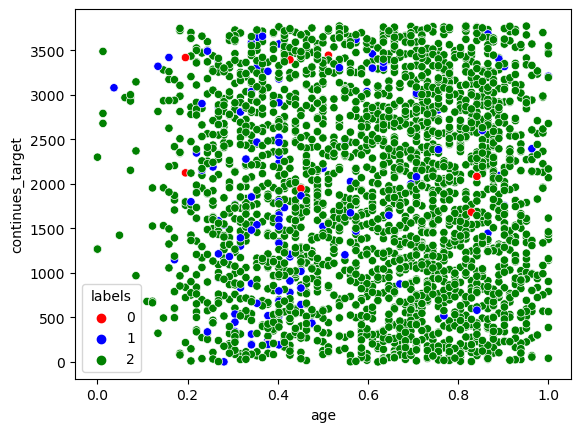

In [69]:
colors_dict= {0:'red',1:'blue',2:'green'}
sns.scatterplot(x_train['age'] ,x_train['continues_target'] ,hue=y_train,palette=colors_dict )

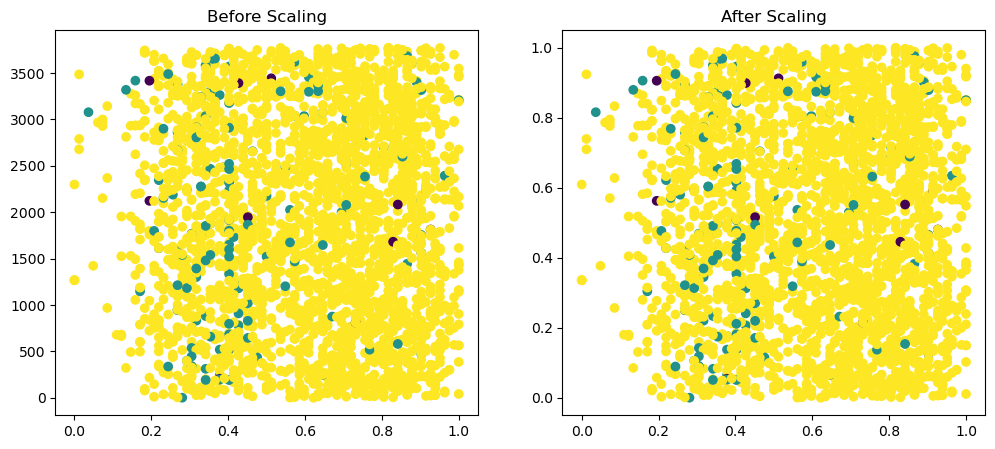

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['age'], x_train['continues_target'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['age'], x_train_scaled['continues_target'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

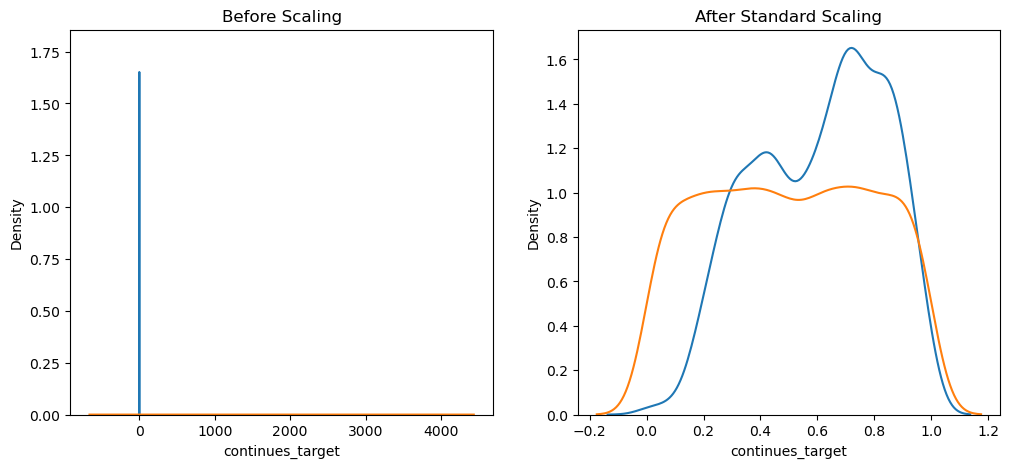

In [63]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.distplot(x_train['age'], ax=ax1)
sns.distplot(x_train['continues_target'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.distplot(x_train_scaled['age'], ax=ax2,hist=False)
sns.distplot(x_train_scaled['continues_target'], ax=ax2,hist=False)
plt.show()

In [10]:
x = df_new.drop('labels',axis=1)
y = df_new['labels']

In [14]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
min_scaler = MinMaxScaler()

In [18]:
min_scaler.fit(x_train)

MinMaxScaler()

In [19]:
x_train_scaled = min_scaler.transform(x_train)
x_test_scaled = min_scaler.transform(x_test)

In [20]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [37]:
x_train['age'].max()

1.0

In [35]:
np.round(x_train.describe(),1)

,age,continues_target
count,2945.0,2945.0
mean,0.6,1893.2
std,0.2,1088.0
min,0.0,1.0
25%,0.4,953.0
50%,0.6,1887.0
75%,0.8,2834.0
max,1.0,3772.0


In [38]:
np.round(x_train_scaled.describe(),1)

,age,continues_target
count,2945.0,2945.0
mean,0.6,0.5
std,0.2,0.3
min,0.0,0.0
25%,0.4,0.3
50%,0.6,0.5
75%,0.8,0.8
max,1.0,1.0


In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf_min_scaler = KNeighborsClassifier()

In [66]:
clf.fit(x_train,y_train)
clf_min_scaler.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [67]:
y_pred = clf.predict(x_test)
y_pred_min_scaler = clf_min_scaler.predict(x_test_scaled)

In [68]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred_min_scaler))

0.9755766621438263
0.9742198100407056
